In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config

In [2]:
import joblib

In [14]:
set_config(transform_output="pandas")

In [5]:
# data and model paths

data_path = "../data/interim/df_without_outliers.csv"

kmeans_path = "../models/mb_kmeans.joblib"
scaler_path = "../models/scaler.joblib"

In [6]:
# load the data

df = pd.read_csv(data_path, usecols=["pickup_longitude","pickup_latitude"])

df.shape

(33234199, 2)

In [9]:
# load the scaler and model

scaler = joblib.load(scaler_path)
kmeans = joblib.load(kmeans_path)

In [10]:
scaler

StandardScaler()

In [11]:
kmeans

MiniBatchKMeans(n_clusters=30, n_init=10, random_state=42)

In [15]:
# scale the input data

df_scaled = scaler.transform(df)

df_scaled.head()

,pickup_longitude,pickup_latitude
0,-0.443778,-0.601549
1,-0.182839,-0.777271
2,-0.285388,-2.626699
3,-0.528059,-1.178462
4,0.365612,1.111533


In [16]:
# get the cluster predictions

predictions = kmeans.predict(df_scaled)

C:\Users\himan\anaconda3\envs\demand_prediction\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


In [17]:
# add the predictions to data

df['region'] = predictions

df.head()

,pickup_longitude,pickup_latitude,region
0,-73.990372,40.734695,7
1,-73.980782,40.729912,26
2,-73.984550,40.679565,9
3,-73.993469,40.718990,10
4,-73.960625,40.781330,8


In [18]:
# form a region grp

region_grp = df.groupby("region")

In [26]:
# sample the data frrom each region

sampled_data = (
    region_grp
    .sample(3000, random_state=42)
)

In [27]:
sampled_data.shape

(90000, 3)

In [28]:
sampled_data

,pickup_longitude,pickup_latitude,region
3269108,-73.961357,40.806641,0
31107559,-73.949677,40.801151,0
4464996,-73.954544,40.805717,0
27828548,-73.960274,40.813190,0
9889390,-73.962280,40.805012,0
...,...,...,...
15947804,-73.954048,40.742893,29
22405125,-73.940086,40.751183,29
13022562,-73.942574,40.753899,29
19639123,-73.951042,40.742039,29


In [33]:
# value counts

sampled_data["region"].value_counts()

region
0     3000
1     3000
28    3000
27    3000
26    3000
25    3000
24    3000
23    3000
22    3000
21    3000
20    3000
19    3000
18    3000
17    3000
16    3000
15    3000
14    3000
13    3000
12    3000
11    3000
10    3000
9     3000
8     3000
7     3000
6     3000
5     3000
4     3000
3     3000
2     3000
29    3000
Name: count, dtype: int64

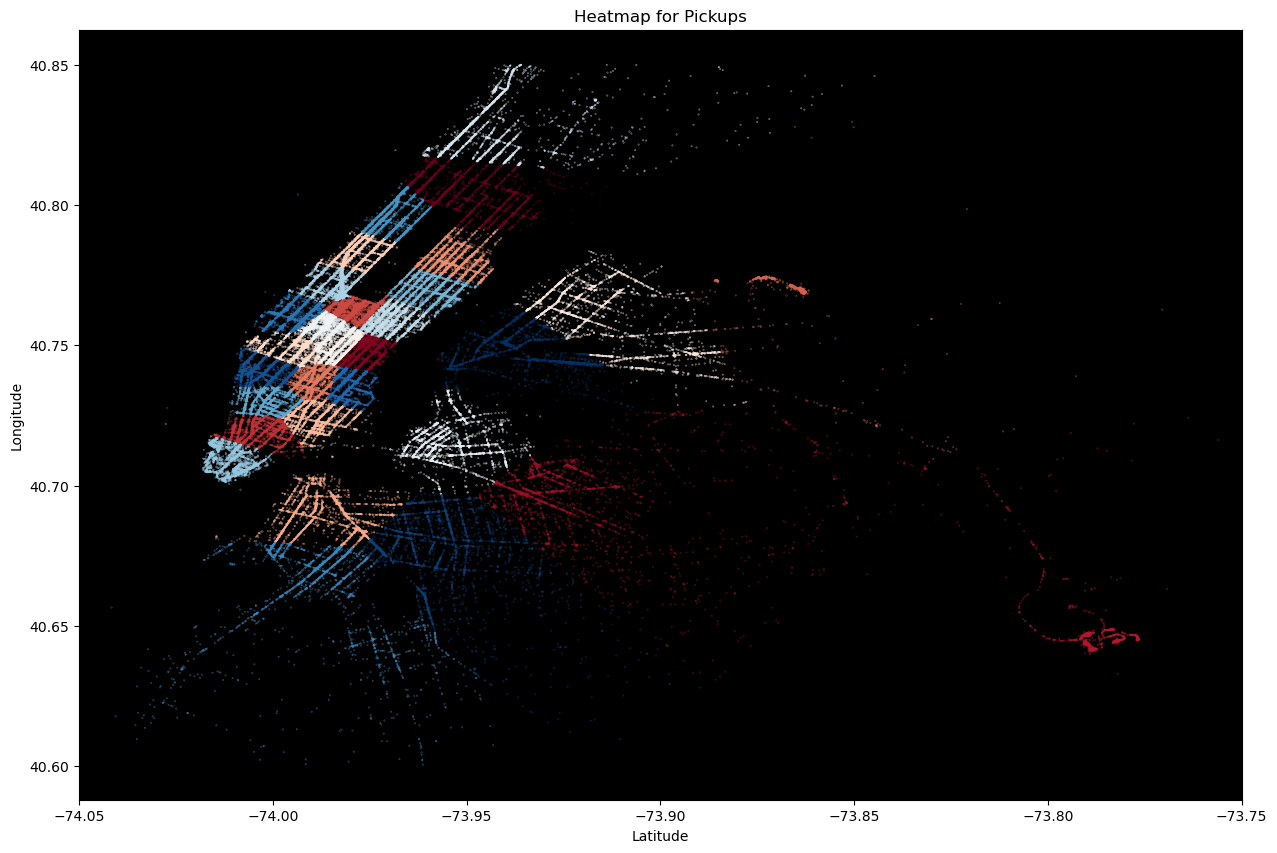

In [36]:
# plot the sampled data on scatterplot

fig,ax = plt.subplots(nrows=1,ncols=1,sharey=True,
                     figsize=(15,10))

ax.set_facecolor('k')
ax.set_xlim(left=-74.05, right=-73.75)

ax.scatter(sampled_data['pickup_longitude'],sampled_data['pickup_latitude'],
           s=0.05,c=sampled_data['region'],cmap="RdBu")
ax.set_title('Heatmap for Pickups')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

plt.show()

In [37]:
# save the sampled data

save_path = "../data/external/plot_data.csv"

sampled_data.to_csv(save_path, index=False)